In [1]:
import pandas as pnd
import seaborn as sns 
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm 
from sklearn.metrics import accuracy_score

In [2]:
diabet=pnd.read_csv(r'C:\Users\semih\diabetes.csv')
diabet.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabet.shape

(768, 9)

In [4]:
diabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabet.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
diabet.isnull().values.any()

np.False_

In [7]:
diabet.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
diabet.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabet["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

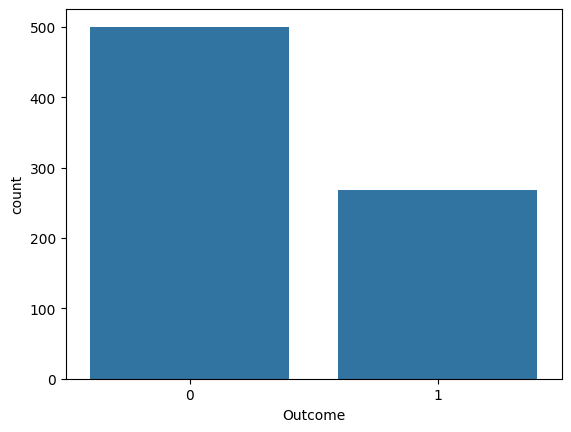

In [10]:
sns.countplot(x="Outcome",data=diabet)

<Axes: >

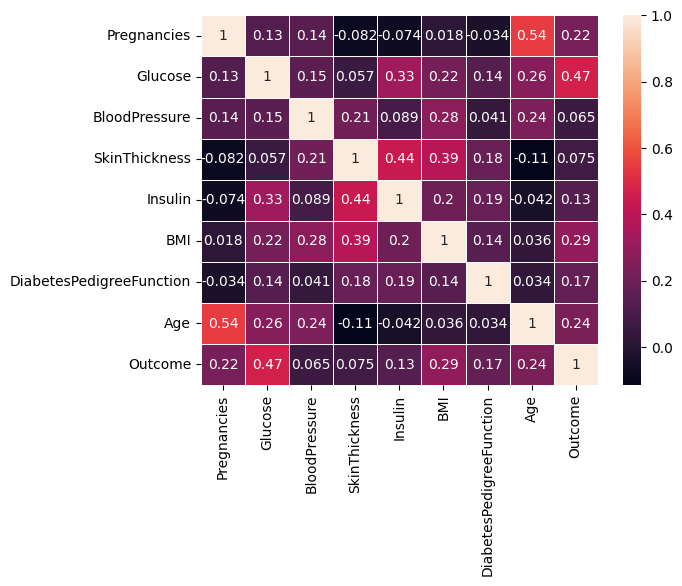

In [11]:
korelasyon=diabet.corr()
sns.heatmap(korelasyon,annot=True,linewidths=0.5)

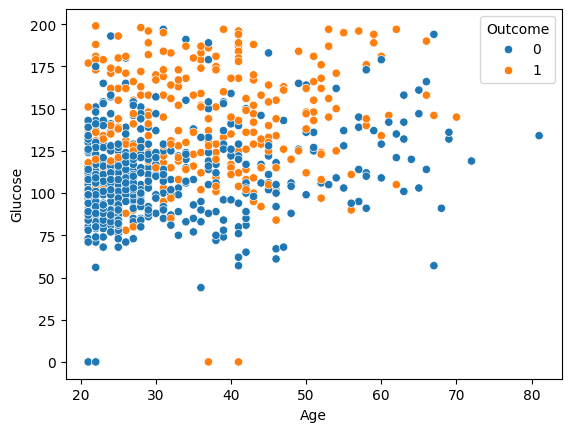

In [12]:
sns.scatterplot(x="Age",y="Glucose",hue="Outcome",data=diabet);

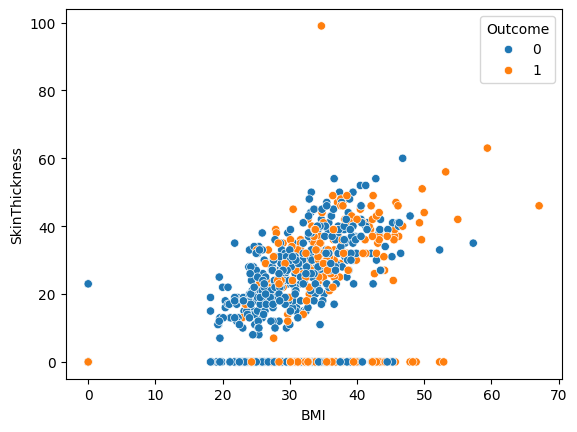

In [13]:
sns.scatterplot(x="BMI",y="SkinThickness",hue="Outcome",data=diabet);

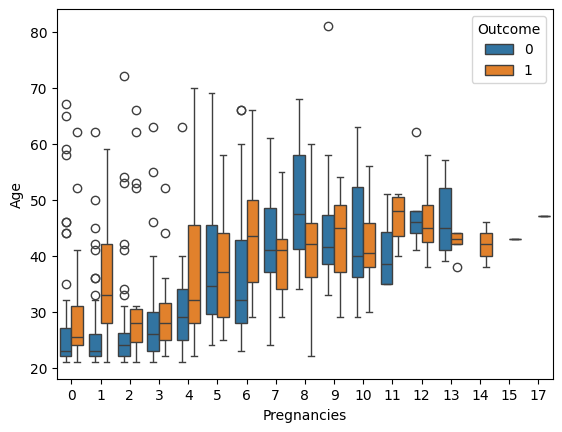

In [14]:
sns.boxplot(x="Pregnancies",y="Age",hue="Outcome",data=diabet);

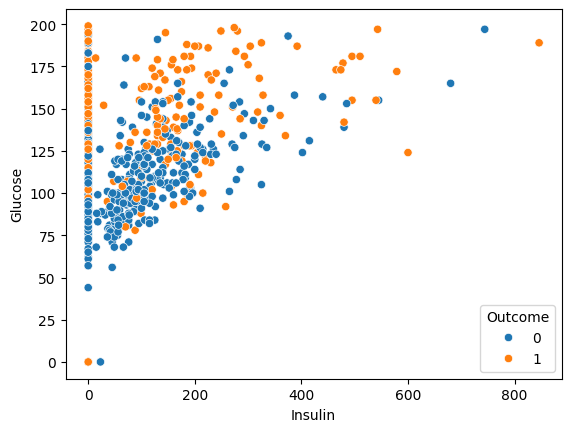

In [15]:
sns.scatterplot(x="Insulin",y="Glucose",hue="Outcome",data=diabet);

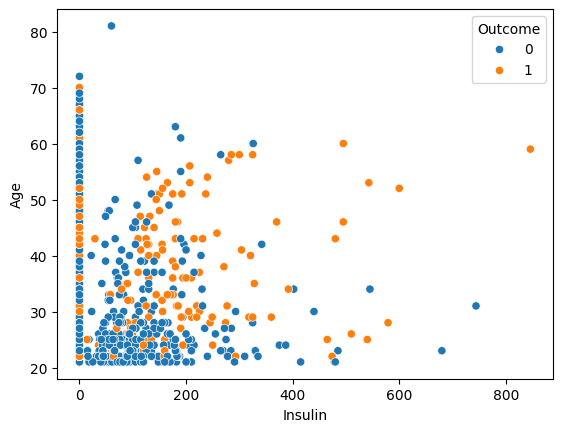

In [16]:
sns.scatterplot(x="Insulin",y="Age",hue="Outcome",data=diabet);

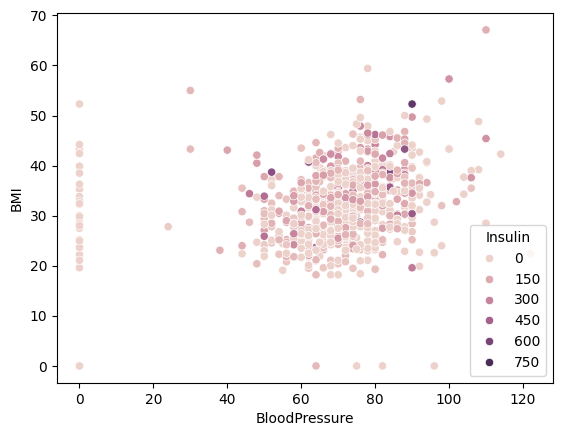

In [17]:
sns.scatterplot(x="BloodPressure",y="BMI",hue="Insulin",data=diabet);

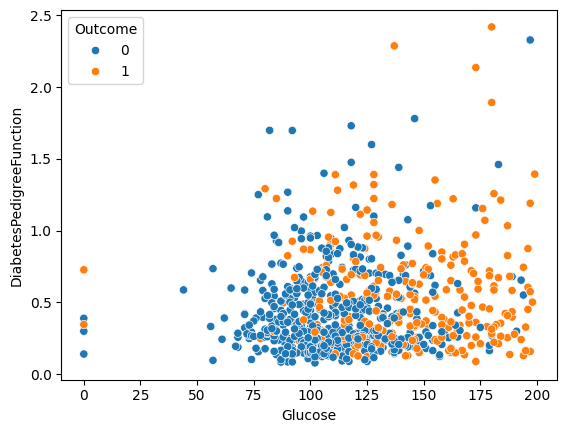

In [18]:
sns.scatterplot(x="Glucose",y="DiabetesPedigreeFunction",hue="Outcome",data=diabet);

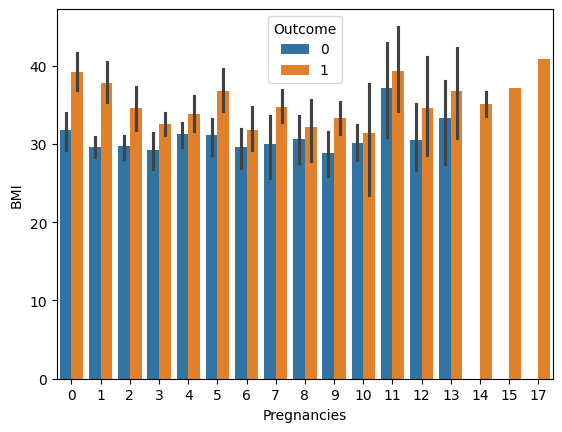

In [19]:
sns.barplot(x="Pregnancies",y="BMI",hue="Outcome",data=diabet);

In [20]:
diabet.groupby(["Pregnancies","Outcome"])["BMI"].mean()

Pregnancies  Outcome
0            0          31.727397
             1          39.213158
1            0          29.616038
             1          37.793103
2            0          29.679762
             1          34.578947
3            0          29.231250
             1          32.548148
4            0          31.255556
             1          33.873913
5            0          31.100000
             1          36.780952
6            0          29.591176
             1          31.775000
7            0          29.975000
             1          34.756000
8            0          30.693750
             1          32.204545
9            0          28.840000
             1          33.300000
10           0          30.114286
             1          31.380000
11           0          37.125000
             1          39.385714
12           0          30.560000
             1          34.575000
13           0          33.280000
             1          36.720000
14           1          35.

In [21]:
x = diabet.drop(["Outcome"],axis=1)
y = diabet["Outcome"]

In [22]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [23]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [24]:
scaler = StandardScaler()

In [25]:
scaler.fit(x)

StandardScaler()

In [26]:
standart_veri = scaler.transform(x)
standart_veri

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [27]:
x=standart_veri
y=diabet["Outcome"]

In [28]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [29]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [30]:
x_train, x_test,y_train, y_test= train_test_split(x,y,test_size=0.2,stratify=y,random_state=1)

In [31]:
x.shape,x_train.shape,x_test.shape

((768, 8), (614, 8), (154, 8))

In [32]:
sınıflandırıcı=svm.SVC(kernel='linear')

In [33]:
sınıflandırıcı.fit(x_train,y_train)

SVC(kernel='linear')

In [34]:
x_train_tahmin=sınıflandırıcı.predict(x_train)
egitim_verisi_dogruluk=accuracy_score(x_train_tahmin,y_train)

In [35]:
"Eğitim verilerimizin doğruluk puanı: ",egitim_verisi_dogruluk

('Eğitim verilerimizin doğruluk puanı: ', 0.7833876221498371)

In [36]:
x_test_tahmin=sınıflandırıcı.predict(x_test)
test_verisi_dogruluk=accuracy_score(x_test_tahmin,y_test)

In [37]:
"Test verilerinin doğruluk puanı: ",test_verisi_dogruluk

('Test verilerinin doğruluk puanı: ', 0.7792207792207793)

In [38]:
veri_girisi=(6,148,72,35,0,33.6,627,50)
veri_girisi_diziyap=np.asarray(veri_girisi)
veri_girisi_sekillendir=veri_girisi_diziyap.reshape(1,-1)
std_veri=scaler.transform(veri_girisi_sekillendir)
std_veri
tahmin=sınıflandırıcı.predict(std_veri)
tahmin
if(tahmin[0]==0):
    print("Kişi şeker hastası değil")
else:
    print("Kişi şeker hastası!")

Kişi şeker hastası!


C:\Users\semih\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pnd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm 
from sklearn.metrics import accuracy_score

# Veriyi yükleme
diabet = pnd.read_csv(r'C:\Users\semih\diabetes.csv')

# Özellikler ve hedef değişkeni ayırma
x = diabet.drop(["Outcome"], axis=1)
y = diabet["Outcome"]

# Verileri ölçeklendirme
scaler = StandardScaler()
scaler.fit(x)
standart_veri = scaler.transform(x)

# Eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(standart_veri, y, test_size=0.2, stratify=y, random_state=1)

# SVM modelini oluşturma ve eğitme
sınıflandırıcı = svm.SVC(kernel='linear')
sınıflandırıcı.fit(x_train, y_train)

# Kullanıcıdan değerleri alma
pregnancies = float(input("Hamilelik sayısını girin: "))
glucose = float(input("Glikoz seviyesini girin: "))
blood_pressure = float(input("Kan basıncını girin: "))
skin_thickness = float(input("Cilt kalınlığını girin: "))
insulin = float(input("İnsülin seviyesini girin: "))
bmi = float(input("Vücut Kitle İndeksini girin: "))
diabetes_pedigree = float(input("Diabetes Pedigree Function değerini girin: "))
age = int(input("Yaşınızı girin: "))

# Kullanıcıdan alınan verileri bir diziye dönüştürme
veri_girisi = (pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree, age)
veri_girisi_diziyap = np.asarray(veri_girisi)

# Veriyi şekillendirme ve ölçeklendirme
veri_girisi_sekillendir = veri_girisi_diziyap.reshape(1, -1)
std_veri = scaler.transform(veri_girisi_sekillendir)

# Tahmin yapma
tahmin = sınıflandırıcı.predict(std_veri)

# Sonucu ekrana yazdırma
if tahmin[0] == 0:
    print("Kişi şeker hastası değil.")
else:
    print("Kişi şeker hastası!")

Hamilelik sayısını girin:  1
Glikoz seviyesini girin:  100
Kan basıncını girin:  80
Cilt kalınlığını girin:  20
İnsülin seviyesini girin:  80
Vücut Kitle İndeksini girin:  22.0
Diabetes Pedigree Function değerini girin:  0.5
Yaşınızı girin:  25


Kişi şeker hastası değil.


C:\Users\semih\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
import os
print(os.getcwd())


C:\Users\semih
